# Basic Statistic and Data Visualization

Phần này tiếp tục giới thiệu một số cách thống kê, khảo sát cơ bản và vẽ chart để phân tích dữ liệu.

## 1. Statistic

Create a DataFrame of Titanic dataset
- [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data)

In [30]:
import pandas as pd

titanic = pd.read_csv('../data/01-titanic-train-set.csv')

### 1.1. Khảo sát thuộc tính của dữ liệu

#### 1.1.1. Khảo sát số lượng hàng, cột

In [31]:
row, column = titanic.shape
print("Row: ", row)
print("Column: ", column)

Row:  891
Column:  12


#### 1.1.2. Xem tên các cột

In [32]:
list(titanic.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

#### 1.1.3. ## 1.1.3. Thống kê cơ bản đối với kiểu dữ lu số học

Xem thêm:
- [Pandas DataFrame.describe() method](https://www.geeksforgeeks.org/python-pandas-dataframe-describe-method/)

In [34]:
percentiles = [ .1, .25, .5, .75, .99 ] # cài đặt percentile
includes = [ 'float', 'int'] # bao gồm kiểu nào
exclude = [ 'object' ] # loại bỏ kiểu nào

titanic.describe(percentiles=percentiles, include=includes, exclude=exclude).T

,count,mean,std,min,10%,25%,50%,75%,99%,max
PassengerId,891.0,446.000000,257.353842,1.00,90.00,223.5000,446.0000,668.5,882.10000,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.00,0.0000,0.0000,1.0,1.00000,1.0000
Pclass,891.0,2.308642,0.836071,1.00,1.00,2.0000,3.0000,3.0,3.00000,3.0000
Age,714.0,29.699118,14.526497,0.42,14.00,20.1250,28.0000,38.0,65.87000,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.00,0.0000,0.0000,1.0,5.00000,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.00,0.0000,0.0000,0.0,4.00000,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.55,7.9104,14.4542,31.0,249.00622,512.3292


#### 1.1.4. ## 1.1.4. Thống kê cơ bản đối với kiểu dữ lu phân loại

In [42]:
includes =  [ 'object' ] # bao gồm kiểu nào
exclude =  [ 'float', 'int']# loại bỏ kiểu nào

titanic.describe(percentiles=percentiles, include=includes, exclude=exclude).T

,count,unique,top,freq
Name,891,891,"Mack, Mrs. (Mary)",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,C23 C25 C27,4
Embarked,889,3,S,644


In [35]:
includes = [ 'object' ]# bao gồm kiểu nào
exclude = [ 'float', 'int'] # loại bỏ kiểu nào

titanic.describe(include=includes, exclude=exclude).T

,count,unique,top,freq
Name,891,891,"Mack, Mrs. (Mary)",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,C23 C25 C27,4
Embarked,889,3,S,644


#### 1.1.5. ## 1.1.5. Thống kê cơ bản một c dữ liệu

In [36]:
# cách dùng tương tự phần trên
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### 1.1.6. #### 1.1.6. Với kiểu dữ liệu rời rạc, thống kê các giá trị duy nhất

In [6]:
print(list(titanic.Sex.unique()))
print(list(titanic.Survived.unique()))

['male', 'female']
[0, 1]


#### 1.1.7. #### 1.1.7. Thống kê với groupby

In [41]:
titanic[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### 1.2. Khảo sát quan hệ của dữ liệu

#### 1.2.1. Tìm mối tương quan bằng Hiệp phương sai

**Hiệp phương sai** (Covariance) biểu diễn sự cùng tăng/giảm của 2 biến dữ liệu. Công thức:

$$Cov(X,Y)=\frac{\sum_{i}^{n}(x_{i}-x_{avg})(y_{i}-y_{avg})}{n-1}$$

Nếu $Cov(X,Y) > 0$, thì $X$ và $Y$ đồng biến, nghĩa là cùng tăng/cùng giảm.


In [7]:
# VD: tuổi có tương quan với sống sót hay không?
titanic.Age.cov(titanic.Survived)

-0.5512960976817095

#### 1.2.2. Xác định mức độ tương quan bằng Hệ số tương quan

**Hệ số tương quan** (Correlation coefficient) là chỉ số thống kê đo lường mức độ mạnh yếu của mối quan hệ giữa hai biến số. Công thức:

$$\rho_{X,Y} = \frac{Cov(X,Y)}{\sigma_{X}\sigma_{Y}}$$

Tính chất:

- $-1 \leq \rho_{X,Y} \leq 1$
- $\rho_{X,Y} \leq  0$: Hai biến tương quan âm hoặc nghịch biến
- $\rho_{X,Y} \ge  0$: Hai biến tương quan dương hoặc đồng biến
- $\rho_{X,Y} = 0$: Hai biến độc lập, không có tương quan


In [50]:
# VD: tuổi có tương quan với sống sót hay không?
titanic.Age.corr(titanic.Survived)

-0.07722109457217768

## 2. Data Visualization

Why:
- Graphs help us understand data, especially qualitative aspects of data, possibly more quickly and easily
- Graphs are a powerful tool to summarize data
- Graphs help us identify patterns, spot outliers, detect corrupt data
- Graphs help us see the relationships among features, and between features and labels, therefore help us in model selection and feature selection.


In [51]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

### 2.1. Line chart

- A line plot is generally used to present observations collected at regular intervals.
- The x-axis represents the regular interval, such as time.
- The y-axis shows the observations, ordered by the x-axis and connected by a line.


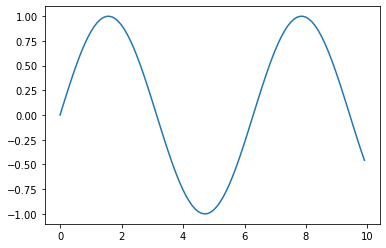

In [52]:
# consistent interval for x-axis 
x = [x*0.1 for x in range(100)] 
# function of x for y-axis
y = [math.sin(i) for i in x ]
# create line plot
plt.plot(x, y)
# show line plot
plt.show()

### 2.2. Bar chart

- A bar chart is generally used to present relative quantities for multiple categories.
- The x-axis represents the categories and are spaced evenly.
- The y-axis represents the quantity for each category and is drawn as a bar from the baseline to the appropriate level on the y-axis.


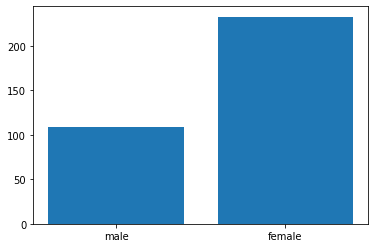

In [53]:
x_bar = list(titanic.Sex.unique())
y_bar = [ len(titanic[(titanic.Survived == 1) & (titanic.Sex == i)]) for i in x_bar ]

plt.bar(x_bar, y_bar)
plt.show()

### 2.3. Histogram

- A histogram plot is generally used to summarize the distribution of a data sample.
- The x-axis represents discrete bins or intervals for the observations.


/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


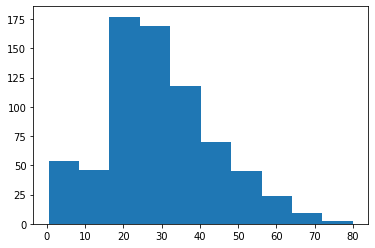

In [55]:
survived_dist = titanic.Age
plt.hist(list(survived_dist))
plt.show()

### 2.4. Box and Whisker

- A box and whisker plot, or boxplot for short, is generally used to summarize the distribution of a data sample.
- The x-axis is used to represent the data sample, where multiple boxplots can be drawn side by side on the x-axis if desired.
- The y-axis represents the observation values.
- A box is drawn to summarize the middle 50
- The median, or 50th percentile, is drawn with a line.
- A value called the interquartile range, or IQR, is calculated as 1.5 * the difference between the 75th and 25th percentiles. Lines called whiskers are drawn extending from both ends of the box with the length of the IQR to demonstrate the expected range of sensible values in the distribution. Observations outside the whiskers might be outliers and are drawn with small circles.


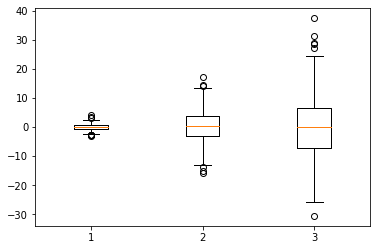

In [58]:
# example of a box and whisker plot
from numpy.random import seed
from numpy.random import randn 
from matplotlib import pyplot
# seed the random number generator 
seed(1)
# random numbers drawn from a Gaussian distribution
x = [randn(1000), 5 * randn(1000), 10 * randn(1000)]
# create box and whisker plot
pyplot.boxplot(x)
# show line plot
pyplot.show()

### 2.5. Scatter

- A scatter plot (or ‘scatterplot’) is generally used to summarize the relationship between two paired data samples.
- Paired data samples means that two measures were recorded for a given observation, such as the weight and height of a person.
- The x-axis represents observation values for the first sample, and the y-axis represents the observation values for the second sample. Each point on the plot represents a single observation.


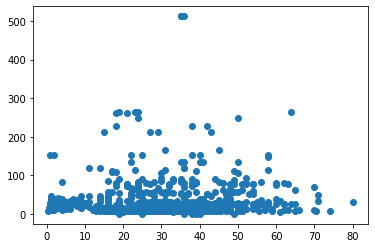

In [21]:
plt.scatter(titanic.Age, titanic.Fare)
plt.show()

## 3. Exercise

Mô tả dữ liệu:
- [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data)

Phần này yêu cầu phân tích dữ liệu Titanic theo các gợi ý sau:

### 1. Dữ liệu này được tạo ra trong ngữ cảnh nào?

### 2. Dữ liệu này có nguồn gốc từ đâu?

### 3. Một dòng trong dữ liệu đại diện cho cái gì?

### 4. Dữ liệu này có những thuộc tính nào? Ý nghĩa từng thuộc tính.

### 5. Những thuộc tính nào có giá trị phân loại (categorical)?

Giá trị phân loại này gồm có các loại sau:
- Nominal
- Ordinal
- Ratio
- Interval based

### 6. Những thuộc tính nào có giá trị số (numerical)?

Giá trị số gồm:
- Continous: giá trị liên tục
- Discrete: giá trị rời rạc

### 7. Những thuộc tính nào có giá trị hỗn hợp (trộn lẫn chữ/số, độ quan trọng, ...)?

### 8. Những thuộc tính nào có thể có lỗi về typo?

Nghĩa là cần chuẩn hóa lại.

### 9. Những thuộc tính nào có chứa giá trị rỗng hoặc null?

### 10. Tìm phân phối của những thuộc tính kiểu số.

Tổng số dòng là bao nhiêu?

Với mỗi thuộc tính số học:

- Tìm giá trị min, max, avg.
- Tìm độ lêch chuẩn.

### 11. Tìm phân phối của những thuộc tính kiểu phân loại?

Với mỗi thuộc tính phân loại:

- Tìm count.
- Tìm số lượng giá trị duy nhất.
- Tìm giá trị lớn nhất
- Tìm tần suất xuất hiện mỗi giá trị.

### 12. Mục tiêu phân tích là gì?

### 13. Thực hiện những thống kê cơ bản, liên tục đặt giả thiết và kiểm chứng giả thuyết bằng số liệu, sơ đồ. Rút càng nhiều insight càng tốt.

Ví dụ:

- Với mỗi giới tính thì tỉ lệ sống là bao nhiêu?
- Với mỗi khoang hạng thì tỉ lệ sống là bao nhiêu?
- Số lượng anh/chị/em có liên quan gì đến tỉ lệ sống hay không?
- Giữa độ tuổi và tỉ lệ sống có quan hệ gì không?

Sau khi thực hiện bài tập xong, xem gợi ý phân tích ở các bài sau đây để improve thêm:
- [Titanic Data Science Solutions](https://www.kaggle.com/startupsci/titanic-data-science-solutions)
- [Titanic_Predict Survival](https://www.kaggle.com/sureshmecad/titanic-predict-survival)

